# T81-558: Applications of Deep Neural Networks
**Module 6: Convolutional Neural Networks (CNN) for Computer Vision**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 6 Material

* Part 6.1: Image Processing in Python [[Video]](https://www.youtube.com/watch?v=4Bh3gqHkIgc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_06_1_python_images.ipynb)
* Part 6.2: Keras Neural Networks for Digits and Fashion MNIST [[Video]](https://www.youtube.com/watch?v=-SA8BmGvWYE&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_06_2_cnn.ipynb)
* Part 6.3: Implementing a ResNet in Keras [[Video]](https://www.youtube.com/watch?v=qMFKsMeE6fM&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_06_3_resnet.ipynb)
* Part 6.4: Using Your Own Images with Keras [[Video]](https://www.youtube.com/watch?v=VcFja1fUNSk&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_06_4_keras_images.ipynb)
* **Part 6.5: Recognizing Multiple Images with YOLO Darknet** [[Video]](https://www.youtube.com/watch?v=oQcAKvBFli8&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_06_5_yolo.ipynb)

In [0]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

# Part 6.5: Recognizing Multiple Images with Darknet

Convolutional neural networks are great at recognizing classifying a single item that is centered in an image.  However, as humans we are able to recognize many items in our field of view, in real-time.  It is very useful to be able to recognize multiple items in a single image.  One of the most advanced means of doing this is YOLO DarkNet (not to be confused with the Internet [Darknet](https://en.wikipedia.org/wiki/Darknet).  YOLO is an acronym for You Only Look Once.  This speaks to the efficency of the algorithm.  

* Redmon, J., Divvala, S., Girshick, R., & Farhadi, A. (2016). [You only look once: Unified, real-time object detection](https://arxiv.org/abs/1506.02640). In *Proceedings of the IEEE conference on computer vision and pattern recognition* (pp. 779-788).

The following image shows YOLO tagging in action.

![DarkNet](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/darknet-predictions.jpg "DarkNet")

It is also possible to run YOLO on live video streams.  The following frame is from the YouTube Video for this module.

![DarkNet Video](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/yolo_video.png "DarkNet Video")

As you can see it is classifying many things in this video.  My collection of books behind me is adding considerable "noise", as DarkNet tries to classify every book behind me.  If you watch the video you will note that it is less than perfect.  The coffee mug that I pick up gets classified as a cell phone and at times a remote.  The small yellow object behind me on the desk is actually a small toolbox.  However, it gets classified as a book at times and a remote at other times.  Currently this algorithm classifies each frame on its own.  More accuracy could be gained by using multiple images together.  Consider when you see an object coming towards you, if it changes angles, you might form a better opinion of what it was.  If that same object now changes to an unfavorable angle, you still know what it is, based on previous information.

### How Does DarkNet/YOLO Work?

YOLO begins by resizing the image to an $S \times S$ grid.  A single convolutional neural network is run against this grid that predicts bounding boxes and what might be contained by those boxes.  Each bounding box also has a confidence in which item it believes the box contains.  This is a regular convolution network, just like we've seen privously.  The only difference is that a YOLO CNN outputs a number of prediction bounding boxes. At a high level this can be seen by the following diagram.

![The YOLO Detection System](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/yolo-1.png "The YOLO Detection System")

The output of the YOLO convolutional neural networks is essentially a multiple regression.  The following values are generated for each of the bounding records that are generated.

* **x** - The x-coordinate of the center of a bounding rectangle.
* **y** - The y-coordinate of the center of a bounding rectangle.
* **w** - The width of each bounding rectangle.
* **h** - The height of each bounding rectangle.
* **labels** - The relative probabilities of each of the labels (1 value for each label)
* **confidence** - The confidence in this rectangle.

The output layer of a Keras neural network is a Tensor.  In the case of YOLO, this output tensor is 3D and is of the following dimensions.

$ S \times S \times (B \cdot 5 + C) $

The constants in the above expression are:

* *S* - The dimensions of the YOLO grid that is overlaid across the source image.
* *B* - The number of potential bounding rectangles generated for each grid cell.
* *C* - The number of class labels that here are.

The value 5 in the above expression is simply the count of non-label components of each bounding rectangle ($x$, $y$, $h$, $w$, $confidence$.

Because there are $S^2 \cdot B$ total potential bounding rectangles, the image will get very full.  Because of this it is important to drop all rectangles below some threshold of confidence.  This is demonstrated by the image below.

![The YOLO Detection System](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/yolo-2.png "The YOLO Detection System")

The actual structure of the convolutional neural network behind YOLO is relatively simple and is shown in the following image.  Because there is only one convolutional neural network, and it "only looks once," the performance is not impacted by how many objects are detected. 

![The YOLO Detection System](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/yolo-3.png "The YOLO Detection System")

The following image shows some additional recognitions being performed by a YOLO.

![The YOLO Detection System](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/yolo-4.png "The YOLO Detection System")



### Using DarkFlow in Python

To make use of DarkFlow you have several options:

* **[DarkNet](https://pjreddie.com/darknet/yolo/)** - The original implementation of YOLO, written in C.
* **[DarkFlow](https://github.com/thtrieu/darkflow)** - Python package that implements YOLO in Python, using TensorFlow.

DarkFlow can be used from the command line.  This allows videos to be produced from existing videos.  This is how the YOLO videos used in the class module video were created.

It is also possible call DarkFlow directly from Python.  The following code performs a classification of the image of my dog and I in the kitchen from above.

### Running DarkFlow (YOLO) from Google CoLab

Make sure you create the following folders on your Google drive and download yolo.weights, coco.names, and yolo.cfg into the correct locations.  See the helper script below to set this up.

'/content/drive/My Drive/projects/yolo':
bin  cfg

'/content/drive/My Drive/projects/yolo/bin':
yolo.weights

'/content/drive/My Drive/projects/yolo/cfg':
coco.names  yolo.cfg

In [2]:
!git clone https://github.com/thtrieu/darkflow.git

fatal: destination path 'darkflow' already exists and is not an empty directory.


In [3]:
!pip install ./darkflow/

Processing ./darkflow
  Created wheel for darkflow: filename=darkflow-1.0.0-cp36-cp36m-linux_x86_64.whl size=831152 sha256=b309637e80f1e2880eff31cd2a62c113bd596a004d7ae5f81b56fbb468439848
  Stored in directory: /tmp/pip-ephem-wheel-cache-jvocezlu/wheels/2f/3a/c5/e84e79d73d5a73aa1b5129a66a40947d9d77a32ebed501e431
Successfully built darkflow
  Found existing installation: darkflow 1.0.0
    Uninstalling darkflow-1.0.0:
      Successfully uninstalled darkflow-1.0.0


In [4]:
# Note, if you are using Google CoLab, this can be used to mount your drive to load YOLO config and weights.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
# The following helper script will create a projects/yolo folder for you 
# and download the needed files.  

!mkdir -p /content/drive/My\ Drive/projects
!mkdir -p /content/drive/My\ Drive/projects/yolo
!mkdir -p /content/drive/My\ Drive/projects/yolo/bin
!mkdir -p /content/drive/My\ Drive/projects/yolo/cfg
!wget https://raw.githubusercontent.com/thtrieu/darkflow/master/cfg/coco.names -O /content/drive/My\ Drive/projects/yolo/cfg/coco.names
!wget https://raw.githubusercontent.com/thtrieu/darkflow/master/cfg/yolo.cfg -O /content/drive/My\ Drive/projects/yolo/cfg/yolo.cfg
!wget https://pjreddie.com/media/files/yolov2.weights -O /content/drive/My\ Drive/projects/yolo/bin/yolo.weights

--2019-10-22 17:05:13--  https://raw.githubusercontent.com/thtrieu/darkflow/master/cfg/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘/content/drive/My Drive/projects/yolo/cfg/coco.names’

/content/drive/My D 100%[===================>]     625  --.-KB/s    in 0s      

2019-10-22 17:05:13 (132 MB/s) - ‘/content/drive/My Drive/projects/yolo/cfg/coco.names’ saved [625/625]

--2019-10-22 17:05:14--  https://raw.githubusercontent.com/thtrieu/darkflow/master/cfg/yolo.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 2

### Running DarkFlow (YOLO) Locally

If you wish to run YOLO from your own computer you will need to pip install cython and then follow the instructions [here](https://github.com/thtrieu/darkflow).

### Running DarkFlow (YOLO)

Regardless of which path you take above (Google CoLab or Local) you will run this code to continue.  Make sure to uncomment the correct **os.chdir** command below.

In [6]:
from darkflow.net.build import TFNet
import cv2
import numpy as np
import requests
import os
from scipy import misc
from io import BytesIO
from urllib.request import urlopen
from PIL import Image, ImageFile


os.chdir('/content/drive/My Drive/projects/yolo') # Google CoLab
#os.chdir('/Users/jheaton/projects/darkflow') # Local

# For GPU (Google CoLab)
options = {"model": "./cfg/yolo.cfg", "load": "./bin/yolo.weights", "threshold": 0.1, "gpu": 1.0}

# For CPU 
#options = {"model": "./cfg/yolo.cfg", "load": "./bin/yolo.weights", "threshold": 0.1}

tfnet = TFNet(options)


# Read image to classify
url = "https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/cook.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()

result = tfnet.return_predict(np.asarray(img))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.









Parsing ./cfg/yolo.cfg
Loading ./bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.08202815055847168s
Model has a coco model name, loading coco labels.

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Ye

In [7]:
for row in result:
    print(row)

{'label': 'person', 'confidence': 0.82444996, 'topleft': {'x': 87, 'y': 32}, 'bottomright': {'x': 162, 'y': 230}}
{'label': 'dog', 'confidence': 0.75255954, 'topleft': {'x': 126, 'y': 177}, 'bottomright': {'x': 224, 'y': 262}}
{'label': 'bottle', 'confidence': 0.19970106, 'topleft': {'x': 156, 'y': 62}, 'bottomright': {'x': 165, 'y': 113}}
{'label': 'bottle', 'confidence': 0.59991425, 'topleft': {'x': 175, 'y': 75}, 'bottomright': {'x': 183, 'y': 106}}
{'label': 'bottle', 'confidence': 0.4049024, 'topleft': {'x': 189, 'y': 84}, 'bottomright': {'x': 196, 'y': 106}}
{'label': 'cup', 'confidence': 0.12675706, 'topleft': {'x': 165, 'y': 115}, 'bottomright': {'x': 176, 'y': 124}}
{'label': 'bowl', 'confidence': 0.33156696, 'topleft': {'x': 47, 'y': 123}, 'bottomright': {'x': 81, 'y': 134}}
{'label': 'microwave', 'confidence': 0.6816767, 'topleft': {'x': 0, 'y': 28}, 'bottomright': {'x': 68, 'y': 87}}
{'label': 'oven', 'confidence': 0.6185077, 'topleft': {'x': 0, 'y': 96}, 'bottomright': {'x

# Generate a YOLO Tagged Image

DarkFlow does not contain a built in "boxing function" for images.  However, it is not difficult to create one using the results provided above.  The following code demonstrates this process.

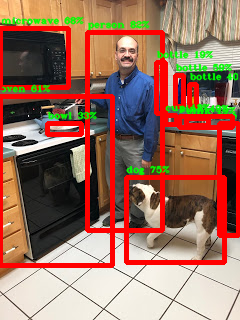

In [9]:
def box_image(img, pred):
    array = np.asarray(img)

    for result in pred:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        bottom_x = result['bottomright']['x']
        bottom_y = result['bottomright']['y']

        confidence = int(result['confidence'] * 100)
        label = f"{result['label']} {confidence}%"

        if confidence > 0.3:
            array = cv2.rectangle(array, (top_x, top_y), (bottom_x, bottom_y), (255,0,0), 3)
            array = cv2.putText(array, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 
              0.45, (0, 255, 0), 1, cv2.LINE_AA)
            
    return Image.fromarray(array, 'RGB')

boxed_image = box_image(img, result)  

boxed_image

# Module 6 Assignment

You can find the first assignment here: [assignment 6](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/assignments/assignment_yourname_class1.ipynb)